In [147]:
# !pip install PyPDF2 pandas

import PyPDF2
import re
import pandas as pd
from google.colab import files
import plotly.express as px



In [56]:

# Function to upload file in Colab
# uploaded = files.upload()


pdf_filename = "ioe_entrance_2081.pdf"

# Function to extract text from PDF
def extract_text_from_pdf(pdf_file):
    with open(pdf_file, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ""
        for page in pdf_reader.pages:
            text += page.extract_text()
    return text


def parse_pdf_content(content):
    lines = content.split('\n')
    data = []

    for line in lines:
        # Use regex to match lines with the structure described
        if re.match(r'^\d+\s+\d{4}-\d+\s+[\w\s]+(Male|Female)\s+.*\s+\d+', line):
            parts = line.split()

            # Extract Serial Number and Form Number
            sno = parts[0]
            form_no = parts[1]

            # Identify Gender and its position
            gender = None
            if 'Male' in parts:
                gender_index = parts.index('Male')
                gender = 'Male'
            elif 'Female' in parts:
                gender_index = parts.index('Female')
                gender = 'Female'

            # Extract Gender, District, Rank, and Remarks
            if gender:
                # Extract District and Rank
                # district = parts[gender_index + 1]
                # rank = parts[gender_index + 2]

                # # Handle Remarks (everything after Rank)
                # remarks = ' '.join(parts[gender_index + 3:]) if len(parts) > gender_index + 3 else None


                district_end_index = gender_index + 1
                while district_end_index < len(parts) and not parts[district_end_index].isdigit():
                    district_end_index += 1

                # Extract District and Rank
                district = ' '.join(parts[gender_index + 1:district_end_index])
                rank = parts[district_end_index]

                # Handle Remarks (if present)
                remarks = ' '.join(parts[district_end_index + 1:]) if len(parts) > district_end_index + 1 else None


                # Extract Name (everything between FormNo and Gender)
                name_parts = parts[2:gender_index]
                name = ' '.join(name_parts)

                # Split Name into First Name and Last Name
                name_split = name.rsplit(' ', 1)
                fname = name_split[0]
                lname = name_split[1] if len(name_split) > 1 else ""

                # Append the parsed data (8 columns in total)
                data.append([sno, form_no, fname, lname, gender, district, rank, remarks])

    return data



In [57]:

# Extract text from PDF
pdf_content = extract_text_from_pdf(pdf_filename)

# Parse the PDF content
parsed_data = parse_pdf_content(pdf_content)

# Create a DataFrame
df = pd.DataFrame(parsed_data, columns=['SNo', 'FormNo', 'FirstName', 'LastName', 'Gender', 'District', 'Rank', 'Remarks'])

# Save as CSV
csv_filename = 'ioe_entrance_results.csv'
df.to_csv(csv_filename, index=False)

# Download the CSV file
# files.download(csv_filename)

# print(f"CSV file '{csv_filename}' has been created and is ready for download.")

# Display the first few rows of the DataFrame
print(df.head())


  SNo     FormNo      FirstName   LastName  Gender   District  Rank Remarks
0   1  2081-4060          Aabha      Regmi  Female    Dhading  4896    None
1   2  2081-6419  Aabhash Kumar      Yadav    Male     Siraha  5959    None
2   3   2081-525        Aabhash  Prajapati    Male  Bhaktapur  2574    None
3   4  2081-1726      Aabhushan    Baruwal    Male    Dhading   439    None
4   5  2081-3126      Aabhushan     Pandit    Male      Kaski  2397    None


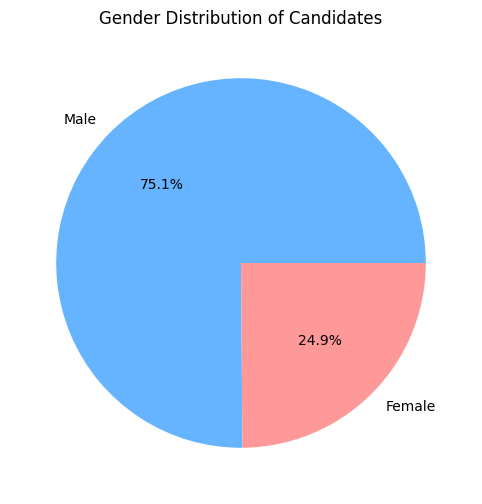

In [82]:

# 1. Gender Distribution
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title('Gender Distribution of Candidates')
plt.ylabel('')
plt.savefig('gender_distribution.png')
plt.show()  # Display plot in Colab

plt.close()


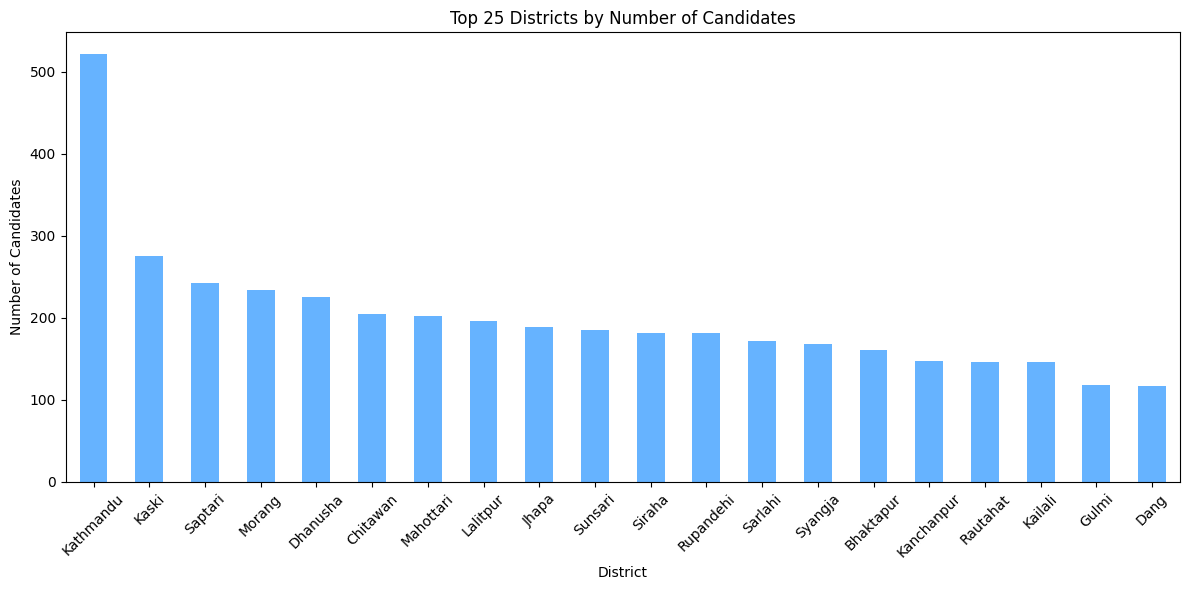

In [78]:

# 2. Top 10 Districts
plt.figure(figsize=(12, 6))
df['District'].value_counts().head(20).plot(kind='bar', color=['#66b3ff'])
plt.title('Top 25 Districts by Number of Candidates')
plt.xlabel('District')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_10_districts.png')
plt.show()  # Display plot in Colab
plt.close()




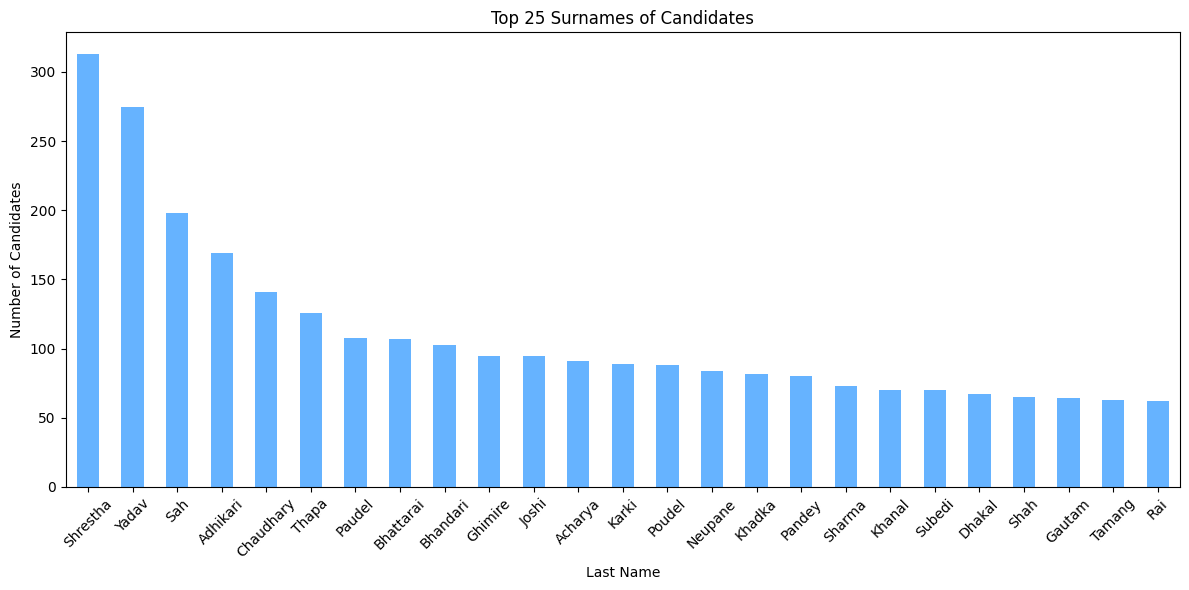

In [73]:

# 2. Top 10 Districts
plt.figure(figsize=(12, 6))
df['LastName'].value_counts().head(25).plot(kind='bar', color=['#66b3ff'])
plt.title('Top 25 Surnames of Candidates')
plt.xlabel('Last Name')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_10_districts.png')
plt.show()  # Display plot in Colab
plt.close()


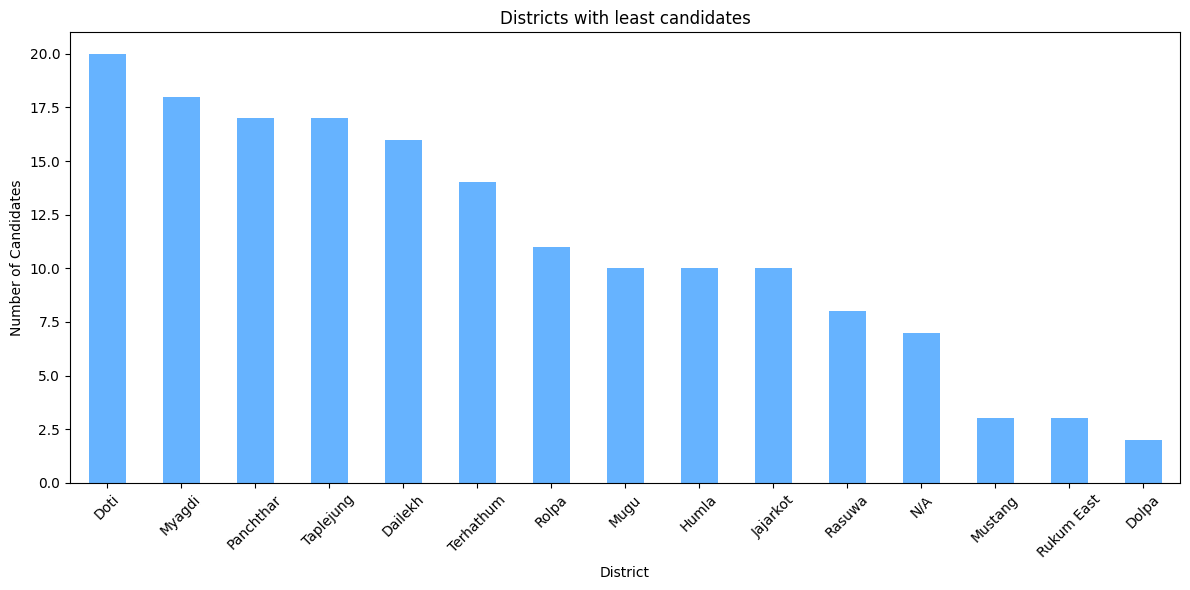

In [72]:
# 2. Top 10 Districts
plt.figure(figsize=(12, 6))
df['District'].value_counts().tail(15).plot(kind='bar', color=['#66b3ff'])
plt.title('Districts with least candidates')
plt.xlabel('District')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_10_districts.png')
plt.show()  # Display plot in Colab
plt.close()


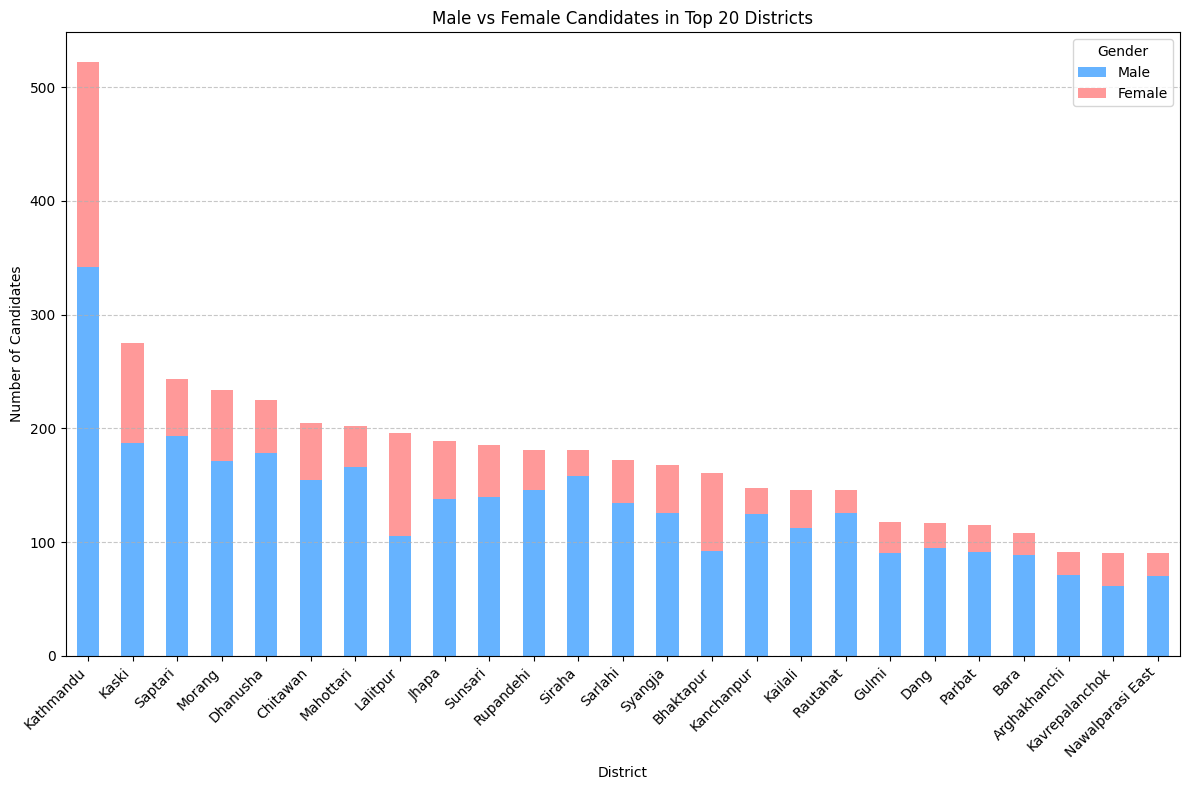

In [76]:
# Group by District and Gender, then count occurrences
gender_distribution = df.groupby(['District', 'Gender']).size().unstack(fill_value=0)

# Find total number of candidates per district
gender_distribution['Total'] = gender_distribution['Male'] + gender_distribution['Female']

# Get the top 20 districts based on total number of candidates
top_20_districts = gender_distribution.nlargest(25, 'Total')

# Plotting the comparison for top 20 districts
ax = top_20_districts[['Male', 'Female']].plot(kind='bar', figsize=(12, 8), stacked=True, color=['#66b3ff', '#ff9999'])
plt.title('Male vs Female Candidates in Top 20 Districts')
plt.xlabel('District')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to make room for labels
plt.savefig('male_vs_female_top_20_districts.png')
plt.show()  # Display plot in Colab

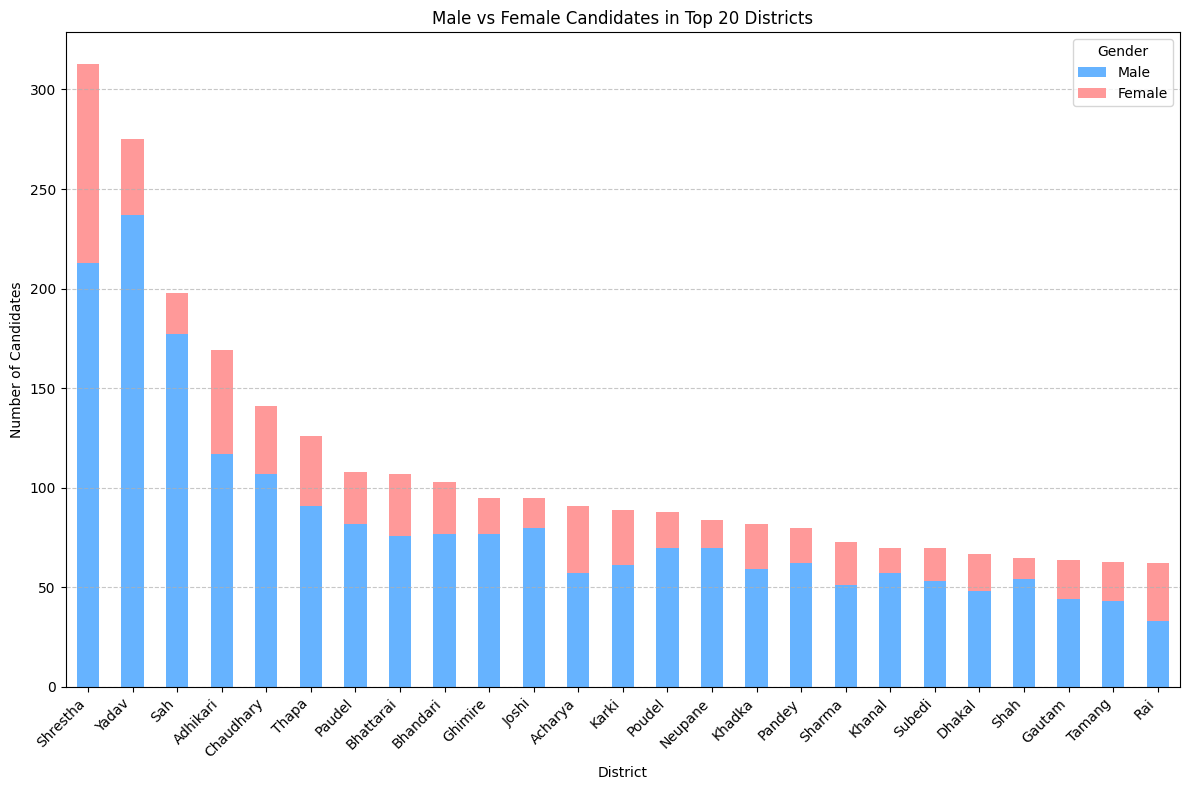

In [77]:
# Group by District and Gender, then count occurrences
gender_distribution = df.groupby(['LastName', 'Gender']).size().unstack(fill_value=0)

# Find total number of candidates per district
gender_distribution['Total'] = gender_distribution['Male'] + gender_distribution['Female']

# Get the top 20 districts based on total number of candidates
top_20_genders = gender_distribution.nlargest(25, 'Total')

# Plotting the comparison for top 20 districts
ax = top_20_genders[['Male', 'Female']].plot(kind='bar', figsize=(12, 8), stacked=True, color=['#66b3ff', '#ff9999'])
plt.title('Male vs Female Candidates in Top 20 Districts')
plt.xlabel('District')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to make room for labels
plt.savefig('male_vs_female_top_20_districts.png')
plt.show()  # Display plot in Colab

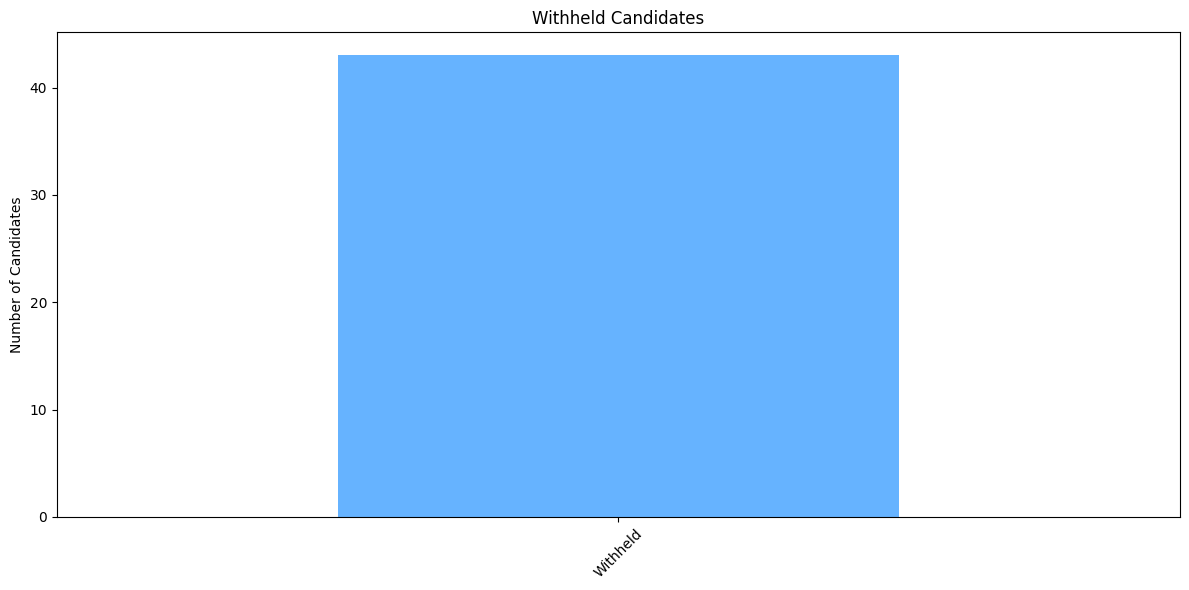

In [136]:
# 2. Top 10 Districts
plt.figure(figsize=(12, 6))
df['Remarks'].value_counts().head(100).plot(kind='bar', color="#66b3ff")
plt.title('Withheld Candidates')
plt.xlabel('')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  # Display plot in Colab
plt.close()

In [129]:
# Count the occurrences of each district
district_counts = df['District'].value_counts().reset_index()
district_counts.columns = ['District', 'Occurrences']


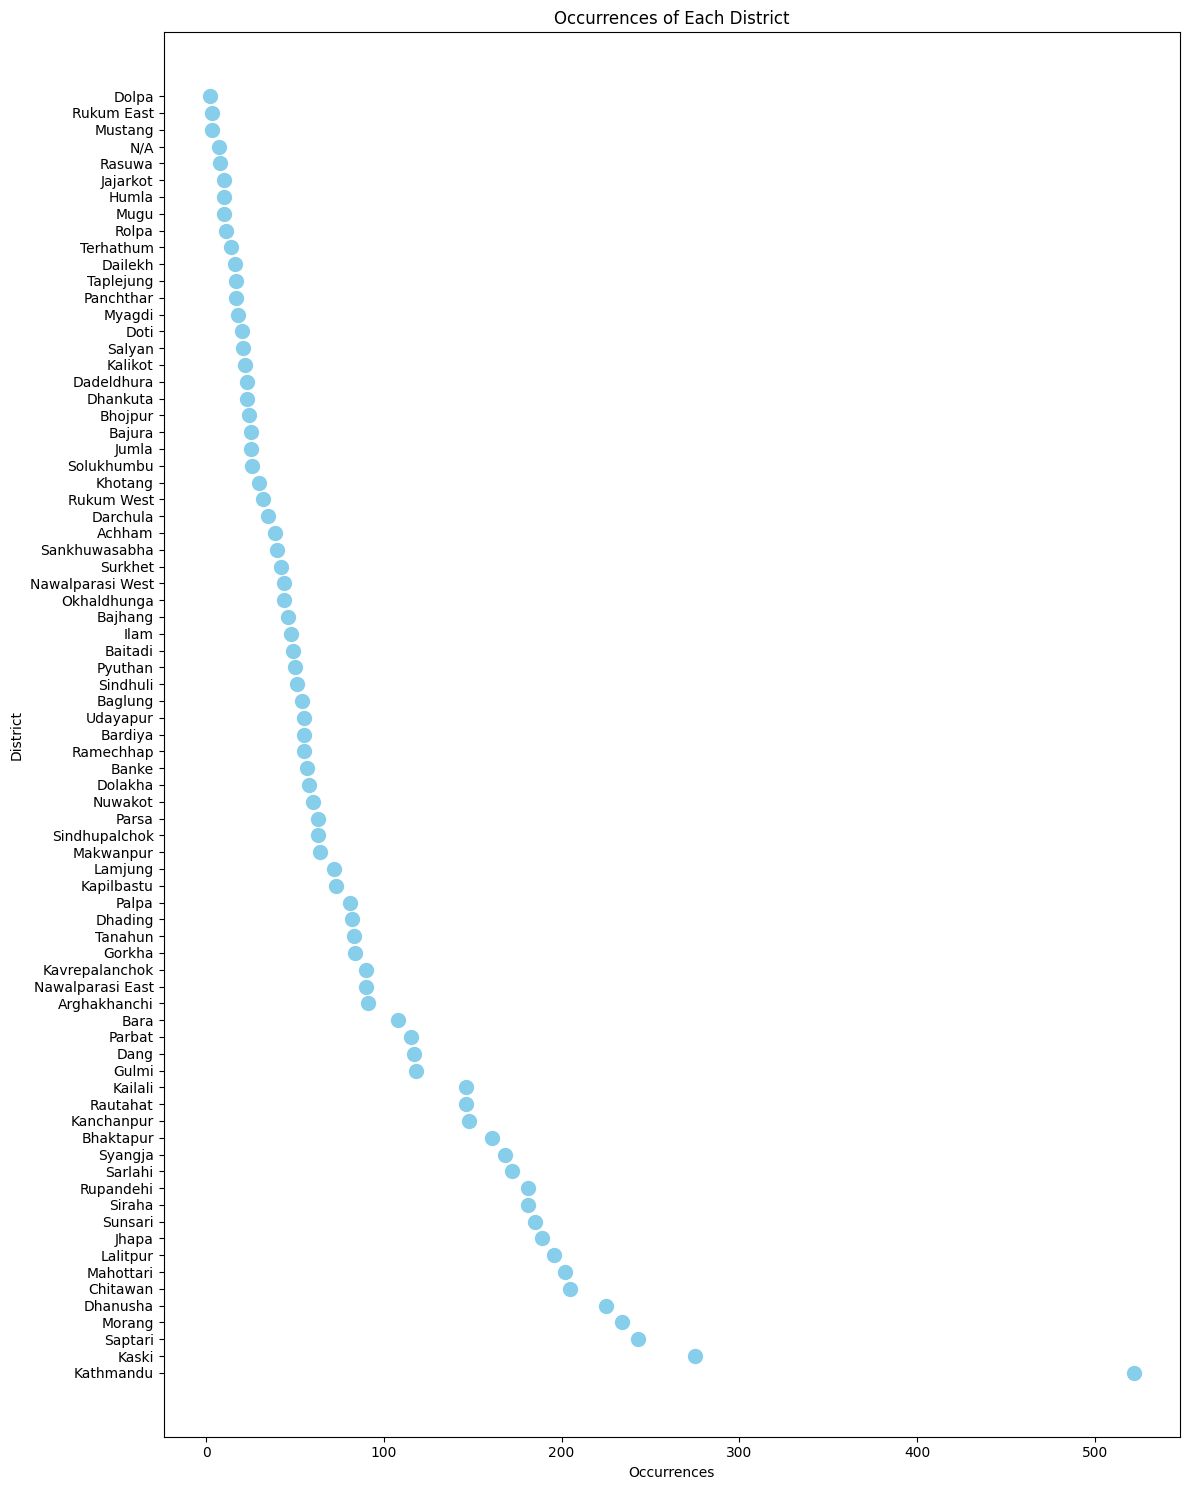

In [116]:
# Plotting Dot Plot
plt.figure(figsize=(12, 15))
plt.scatter(district_counts['Occurrences'], district_counts['District'], color='skyblue', s=100)
plt.xlabel('Occurrences')
plt.ylabel('District')
plt.title('Occurrences of Each District')
plt.tight_layout()
plt.savefig('district_occurrences_dot_plot.png')
plt.show()  # Display plot in Colab

plt.close()

In [128]:

district_counts = district_counts.sort_values(by='District', ascending=False)

# Plotting Interactive Bar Chart ordered by District
fig = px.bar(district_counts, x='Occurrences', y='District',
             title='Total Candidates from Each District',
             labels={'Occurrences': 'Number of Occurrences', 'District': 'District'},
             orientation='h')

fig.update_layout(yaxis_title='District', xaxis_title='Candidates',
                  height=2000)  # Adjust height for better visibility
fig.update_traces(marker_color='skyblue')

In [131]:
# Group by District and Gender, then count occurrences
gender_distribution = df.groupby(['District', 'Gender']).size().unstack(fill_value=0)

# Find total number of candidates per district
gender_distribution['Total'] = gender_distribution['Male'] + gender_distribution['Female']


Gender        Female  Male  Total
District                         
Achham             2    37     39
Arghakhanchi      20    71     91
Baglung           17    37     54
Baitadi            6    43     49
Bajhang            9    37     46
...              ...   ...    ...
Syangja           42   126    168
Tanahun           25    58     83
Taplejung          7    10     17
Terhathum          3    11     14
Udayapur          15    40     55

[77 rows x 3 columns]


In [135]:
# Calculate gender distribution
gender_distribution = df.groupby(['District', 'Gender']).size().unstack(fill_value=0)

# Find total number of candidates per district
gender_distribution['Total'] = gender_distribution['Male'] + gender_distribution['Female']

# Reset index to prepare for plotting
district_counts = gender_distribution.reset_index()

# Plotting Interactive Bar Chart for Gender Distribution
fig = px.bar(district_counts,
             x=['Male', 'Female'],  # Display separate bars for Male and Female
             y='District',
             title='Number of Candidates by Gender for Each District',
             labels={'value': 'Number of Candidates', 'District': 'District', 'variable': 'Gender'},
             height=2000,  # Adjust height for better visibility
             orientation='h',
             color_discrete_map={'Male': '#66b3ff', 'Female': 'pink'})  # Color for each gender

fig.update_layout(xaxis_title='District', yaxis_title='Number of Candidates')

# Show plot in Colab
fig.show()


